# Gradient Descent (最急降下法)

前回までで単回帰， 重回帰を最小２乗法と一緒に取り扱ってきたので，今回からは最急降下法を取り扱っていきます．  
最急降下法は最小２乗法とおなじようにパラメータの最適解を探索するときに用いるものだということを取り敢えず覚えておいてください．  

今回はIris-datasetsという3種類のアヤメの花びらとがくそれぞれの長さと幅を記録したデータセットをつかって，分類します  
あまり数式は出さずにグラフいっぱいで行くのでよろしくお願いします！！！

In [1]:
import pandas as pd
import seaborn as sns
%matplotlib inline

In [2]:
iris = pd.read_csv('data/iris.data',
                 names=["sepal length", "sepal width", "petal length","petal width", "class"])
iris.head()

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


![iris](data/iris.png)
こちらがこのデータセットで登場するアヤメ3種類で，"sepal"はがくで"petal"は花びらだそうです．単位はcmです．  
今回は可視化しやすいように変数を2つに絞るのでそれぞれの相関を見ましょう．

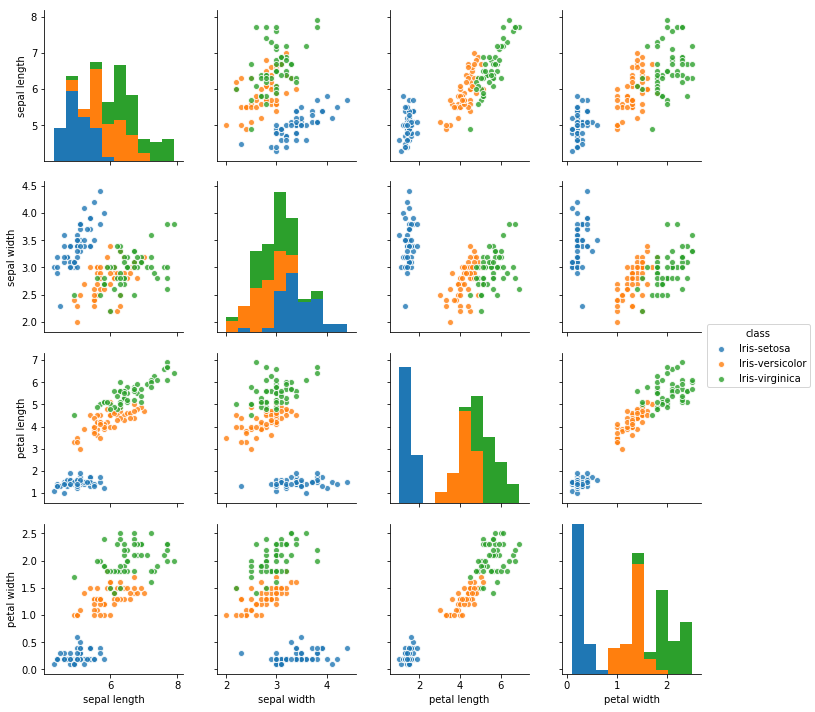

In [3]:
sns.pairplot(iris, hue="class", plot_kws={'alpha': 0.8} )

いまから上の散布図に2本の直線を引くことで3種類のアヤメを分類していきたいので，それに適切そうなものをこの中から選んで2変数とします．  
ですので今回はpetal lengthとpetal widthが一番綺麗に分かれてそうなのでこの2変数を使うことにします．  

使う変数が決まったので以下の手順でデータの前処理をします．
1. 不要な変数を削除
1. 説明変数と目的変数で分割
1. 目的変数を0, 1に置換
1. 学習データとテストデータに分割


In [21]:
# 不要な変数を削除
data = iris.iloc[:, iris.columns != "sepal length"]
data = data.iloc[:, data.columns != "sepal width"]
#data = iris
data.head()

,petal length,petal width,class
0,1.4,0.2,Iris-setosa
1,1.4,0.2,Iris-setosa
2,1.3,0.2,Iris-setosa
3,1.5,0.2,Iris-setosa
4,1.4,0.2,Iris-setosa


In [22]:
# 説明変数と目的変数で分割
X = data.iloc[:, data.columns != "class"]
y = data.iloc[:, data.columns == "class"]
X.head()

,petal length,petal width
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


In [23]:
y.head()

,class
0,Iris-setosa
1,Iris-setosa
2,Iris-setosa
3,Iris-setosa
4,Iris-setosa


In [24]:
y = iris["class"]
y = pd.DataFrame({'setosa': (y == 'Iris-setosa').astype(float),
                  'versicolor': (y == 'Iris-versicolor').astype(float),
                  'virginica': (y == 'Iris-virginica').astype(float)})
y.head()

,setosa,versicolor,virginica
0,1.0,0.0,0.0
1,1.0,0.0,0.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,1.0,0.0,0.0


In [25]:
# 学習データとテストデータで分割
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle

shuffle(X, y, random_state=0)

#ss = StandardScaler()
#X_train = ss.fit_transform(X_train)
#X_test = ss.transform(X_test)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 0)

In [26]:
from src.logistic_regression import MultipleLogisticRegressioniClassifier

In [27]:
clf = MultipleLogisticRegressioniClassifier()

In [28]:
clf.init_state = True
clf.fit(X_train, y_train, X_test, y_test, lr=0.05, steps=600)

Step 1/600    loss: 1.23200563896    acc: 0.32380952381    val_loss: 1.22875059973    val_acc: 0.355555555556
Step 2/600    loss: 1.08692433089    acc: 0.371428571429    val_loss: 1.12715083991    val_acc: 0.244444444444
Step 3/600    loss: 1.02952318876    acc: 0.371428571429    val_loss: 1.09176342203    val_acc: 0.244444444444
Step 4/600    loss: 1.00297200879    acc: 0.371428571429    val_loss: 1.07620987463    val_acc: 0.244444444444
Step 5/600    loss: 0.988324264407    acc: 0.371428571429    val_loss: 1.06699375124    val_acc: 0.244444444444
Step 6/600    loss: 0.978966134505    acc: 0.371428571429    val_loss: 1.06023933325    val_acc: 0.244444444444
Step 7/600    loss: 0.972272993286    acc: 0.371428571429    val_loss: 1.05472008157    val_acc: 0.244444444444
Step 8/600    loss: 0.967058257463    acc: 0.371428571429    val_loss: 1.04997011511    val_acc: 0.244444444444
Step 9/600    loss: 0.962722350746    acc: 0.371428571429    val_loss: 1.04575977462    val_acc: 0.2444444444

Step 198/600    loss: 0.644022907308    acc: 0.704761904762    val_loss: 0.711243170846    val_acc: 0.622222222222
Step 199/600    loss: 0.643079458565    acc: 0.704761904762    val_loss: 0.710228098684    val_acc: 0.622222222222
Step 200/600    loss: 0.642140638392    acc: 0.704761904762    val_loss: 0.70921785036    val_acc: 0.622222222222
Step 201/600    loss: 0.641206414338    acc: 0.704761904762    val_loss: 0.708212393527    val_acc: 0.622222222222
Step 202/600    loss: 0.640276754211    acc: 0.704761904762    val_loss: 0.707211696077    val_acc: 0.622222222222
Step 203/600    loss: 0.639351626069    acc: 0.714285714286    val_loss: 0.706215726145    val_acc: 0.622222222222
Step 204/600    loss: 0.638430998221    acc: 0.714285714286    val_loss: 0.705224452104    val_acc: 0.622222222222
Step 205/600    loss: 0.637514839224    acc: 0.714285714286    val_loss: 0.704237842564    val_acc: 0.622222222222
Step 206/600    loss: 0.636603117885    acc: 0.714285714286    val_loss: 0.703255

Step 368/600    loss: 0.530776803763    acc: 0.780952380952    val_loss: 0.588454313102    val_acc: 0.711111111111
Step 369/600    loss: 0.530306478538    acc: 0.790476190476    val_loss: 0.587941671674    val_acc: 0.711111111111
Step 370/600    loss: 0.529837728171    acc: 0.790476190476    val_loss: 0.587430740869    val_acc: 0.711111111111
Step 371/600    loss: 0.529370543927    acc: 0.790476190476    val_loss: 0.5869215115    val_acc: 0.711111111111
Step 372/600    loss: 0.528904917133    acc: 0.790476190476    val_loss: 0.586413974442    val_acc: 0.711111111111
Step 373/600    loss: 0.528440839178    acc: 0.790476190476    val_loss: 0.585908120633    val_acc: 0.711111111111
Step 374/600    loss: 0.527978301513    acc: 0.790476190476    val_loss: 0.585403941076    val_acc: 0.711111111111
Step 375/600    loss: 0.527517295649    acc: 0.790476190476    val_loss: 0.584901426832    val_acc: 0.711111111111
Step 376/600    loss: 0.52705781316    acc: 0.790476190476    val_loss: 0.58440056

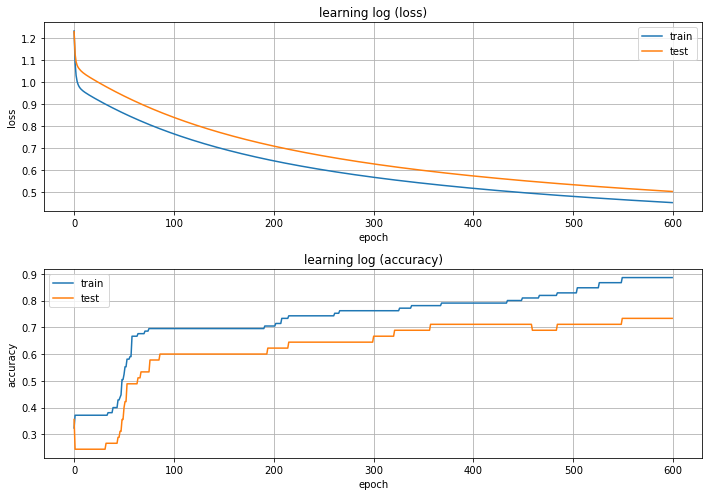

In [29]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(10, 7))
plt.subplot(211)
plt.title("learning log (loss)")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.plot(np.arange(len(clf.loss)), clf.loss, label="train")
plt.plot(np.arange(len(clf.loss)), clf.val_loss, label="test")
plt.legend(loc="best")
plt.grid(True)

plt.subplot(212)
plt.title("learning log (accuracy)")
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.plot(np.arange(len(clf.loss)), clf.acc, label="train")
plt.plot(np.arange(len(clf.loss)), clf.val_acc, label="test")
plt.legend(loc="best")
plt.grid(True)

plt.tight_layout()
plt.show()

In [30]:
clf.W.shape

(2, 3)

In [31]:
clf.W

array([[-0.579596  ,  0.31807491,  0.16593569],
       [-1.07737972, -0.24008436,  1.40211338]])

In [32]:
clf.b

array([[ 2.56598692, -0.38641776, -1.94089587]])